In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

import runTracker

In [11]:
runData = runTracker.data()

In [12]:
cox = np.zeros((4,4))

In [13]:
for key in runData.data.keys():
    print(key)

Date
HR
Pace
Temp
Performance


In [14]:
def pace_to_float(pace):
    pace_list = []
    for p in pace:
        pace_list.append(float(p.split(':')[0]) + float(p.split(':')[1])/60.)
    return pace_list

In [15]:
runData.data['PaceF'] = pace_to_float(runData.data["Pace"])

In [16]:
for i, key1 in enumerate(runData.data.keys()):
    print(key1)

Date
HR
Pace
Temp
Performance
PaceF


In [17]:
features_list = []
i = 0
for key1 in runData.data.keys():
    j = 0
#for i i n range(len(runData.data['Performance'])):
    if key1 == "Date" or key1 == "Pace": continue
    a = (runData.data[key1] - np.mean(runData.data[key1]))
    for key2 in runData.data.keys():
        if key2 == "Date" or key2 == "Pace": continue
        features_list.append(key2)
        b = (runData.data[key2] - np.mean(runData.data[key2]))
        covAB = np.cov(a,b)/(np.std(runData.data[key1])*np.std(runData.data[key2]))
        cox[j,i] = covAB[1,0]
        j += 1
        #print(j,i)
    i += 1
    #print(cox)

[0.5 1.5 2.5 3.5]
['HR', 'Temp', 'Performance', 'PaceF', 'HR', 'Temp', 'Performance', 'PaceF', 'HR', 'Temp', 'Performance', 'PaceF', 'HR', 'Temp', 'Performance', 'PaceF']


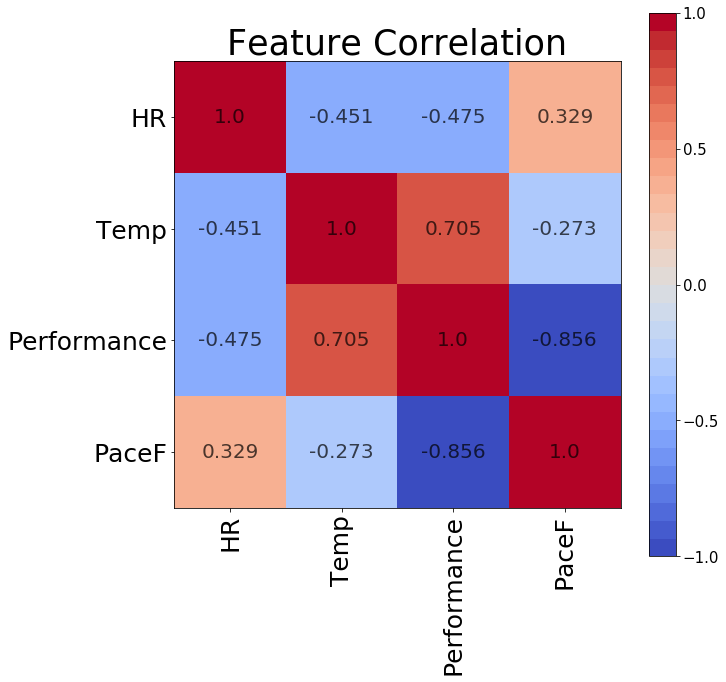

In [18]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('coolwarm', 30)
size = 4

# Limits for the extent
x_start = 0.0
x_end = cox.shape[0]
y_start = 0.0
y_end = cox.shape[0]

extent = [x_start, x_end, y_start, y_end]

cax = ax1.imshow(cox, interpolation="nearest", cmap=cmap, vmin=-1., vmax=1., extent=extent)
#ax1.grid(True)
plt.title('Feature Correlation', fontsize=35)
rangeMax = cox.shape[0] + .5
l = np.arange(.5, rangeMax, step=1.0)
print(l)
plt.xticks(ticks=l,  rotation='vertical')
plt.yticks(ticks=l)
print(features_list)
ax1.set_xticklabels(features_list,fontsize=25)
ax1.set_yticklabels(features_list[::-1],fontsize=25)

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

#for (j,i),label in np.ndenumerate(np.rot90(np.round(cox, 3), k=1)):
for (j,i),label in np.ndenumerate(np.rot90(np.round(cox/cox[0,0], 3), k=1)):
    ax1.text(i+.5,j+.5,label,ha='center',va='center', fontsize=20, alpha=.7)
    #ax2.text(i,j,label,ha='center',va='center')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1.,-.5,.0,.5,1.])
cbar.ax.tick_params(labelsize=15)
plt.show()